[@LorenaABarba](https://twitter.com/LorenaABarba)

12 steps to Navier–Stokes
======
***

This Jupyter notebook continues the presentation of the **12 steps to Navier–Stokes**, the practical module taught in the interactive CFD class of [Prof. Lorena Barba](http://lorenabarba.com). You should have completed [Step 1](./01_Step_1.ipynb) before continuing, having written your own Python script or notebook and having experimented with varying the parameters of the discretization and observing what happens.


Step 2: Nonlinear Convection
-----
***

Now we're going to implement nonlinear convection using the same methods as in step 1.  The 1D convection equation is:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

Instead of a constant factor $c$ multiplying the second term, now we have the solution $u$ multiplying it. Thus, the second term of the equation is now *nonlinear*. We're going to use the same discretization as in Step 1 — forward difference in time and backward difference in space. Here is the discretized equation.

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

Solving for the only unknown term, $u_i^{n+1}$, yields:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

As before, the Python code starts by loading the necessary libraries. Then, we declare some variables that determine the discretization in space and time (you should experiment by changing these parameters to see what happens). Then, we create the initial condition $u_0$ by initializing the array for the solution using $u = 2\ @\ 0.5 \leq x \leq 1$  and $u = 1$ everywhere else in $(0,2)$ (i.e., a hat function).

In [4]:
import numpy                 # we're importing numpy 
import matplotlib as plt
from matplotlib import pyplot    # and our 2D plotting library
plt.style.use('dark_background')
%matplotlib inline


nx = 41
dx = 2 / (nx - 1)
nt = 20    #nt is the number of timesteps we want to calculate
dt = .025  #dt is the amount of time each timestep covers (delta t)

u = numpy.ones(nx)      #as before, we initialize u with every value equal to 1.
u[int(.5 / dx) : int(1 / dx + 1)] = 2  #then set u = 2 between 0.5 and 1 as per our I.C.s

un = numpy.ones(nx) #initialize our placeholder array un, to hold the time-stepped solution

The code snippet below is *unfinished*. We have copied over the line from [Step 1](./01_Step_1.ipynb) that executes the time-stepping update. Can you edit this code to execute the nonlinear convection instead?

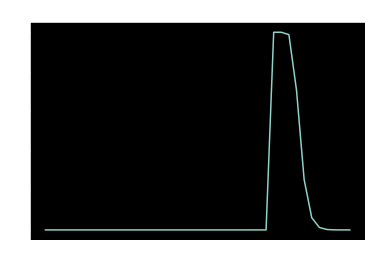

In [16]:
for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx):  ##now we'll iterate through the u array
    
     ###This is the line from Step 1, copied exactly.  Edit it for our new equation.
     ###then uncomment it and run the cell to evaluate Step 2   
      
           u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1]) 

plt.pyplot.title('Initial Plot')
pyplot.plot(numpy.linspace(0, 2, nx), u) ##Plot the results

What do you observe about the evolution of the hat function under the nonlinear convection equation? What happens when you change the numerical parameters and run again?

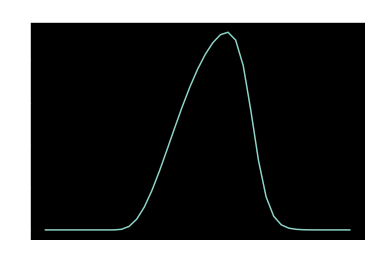

In [30]:
nx = 41
dx = 2 / (nx - 1)
nt = 100    #nt is the number of timesteps we want to calculate
dt = .0025  #dt is the amount of time each timestep covers (delta t)

u = numpy.ones(nx)      #as before, we initialize u with every value equal to 1.
u[int(.5 / dx) : int(1 / dx + 1)] = 2  #then set u = 2 between 0.5 and 1 as per our I.C.s

un = numpy.ones(nx) #initialize our placeholder array un, to hold the time-stepped solution

for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    
    for i in range(1, nx):  ##now we'll iterate through the u array
      
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1]) 

plt.pyplot.title('dt = 0.0025, nt = 100')
pyplot.plot(numpy.linspace(0, 2, nx), u) ##Plot the results

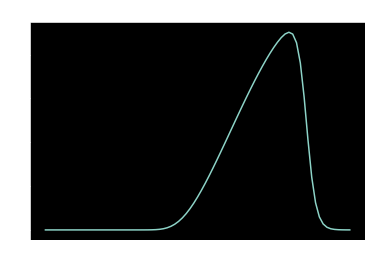

In [27]:
nx = 81
dx = 2 / (nx - 1)
nt = 200    #nt is the number of timesteps we want to calculate
dt = .0025  #dt is the amount of time each timestep covers (delta t)

u = numpy.ones(nx)      #as before, we initialize u with every value equal to 1.
u[int(.5 / dx) : int(1 / dx + 1)] = 2  #then set u = 2 between 0.5 and 1 as per our I.C.s

un = numpy.ones(nx) #initialize our placeholder array un, to hold the time-stepped solution

for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    
    for i in range(1, nx):  ##now we'll iterate through the u array
      
        u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1]) 

plt.pyplot.title('nx = 81')
pyplot.plot(numpy.linspace(0, 2, nx), u) ##Plot the results

## Playing with parameters

We'll use the same functions from the previous notebook to visualize what happens to the wave with non-linear convection.

In [2]:
def convection(nt, nx, tmax, xmax, c):
    """
    Returns the velocity field and distance for 1D linear convection
    """
    # Increments
    dt = tmax/(nt-1)
    dx = xmax/(nx-1)

    # Initialise data structures
    import numpy as np
    u = np.zeros((nx,nt))
    x = np.zeros(nx)

    # Boundary conditions
    u[0,:] = u[nx-1,:] = 1

    # Initial conditions
    for i in range(1,nx-1):
        if(i > (nx-1)/4 and i < (nx-1)/2):
            u[i,0] = 2
        else:
            u[i,0] = 1

    # Store wave positions for different times
    for n in range(0,nt-1):
        for i in range(1,nx-1):
            u[i,n+1] = u[i,n]-u[i,n]*(dt/dx)*(u[i,n]-u[i-1,n])

    # Store X values
    for i in range(0,nx):
        x[i] = i*dx

    return u, x

def plot_convection(u,x,nt,title):
    """
    Plots the 1D velocity field
    """
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    plt.figure()
    colour=iter(cm.rainbow(np.linspace(0,10,nt)))
    for i in range(0,nt,10):
        c=next(colour)
        plt.plot(x,u[:,i],c=c)
        plt.xlabel('x (m)')
        plt.ylabel('u (m/s)')
        plt.ylim([0,2.2])
        plt.title(title)
    plt.show()

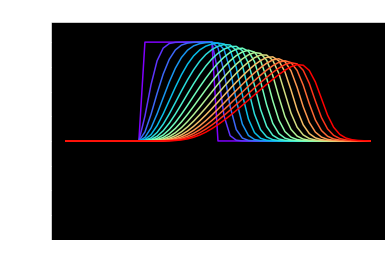

In [5]:
u,x = convection(151, 51, 0.5, 2.0, 0.5)
plot_convection(u,x,151,'Figure 1: c=0.5m/s, nt=151, nx=51, tmax=0.5s')

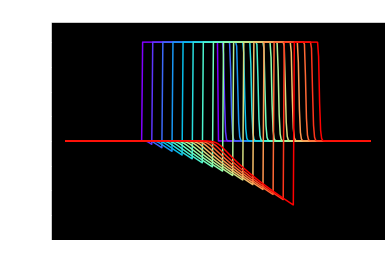

In [6]:
u,x = convection(151, 302, 0.5, 2.0, 0.5)
plot_convection(u,x,151,'Figure 2: c=0.5m/s, nt=151, nx=302, tmax=0.5s')

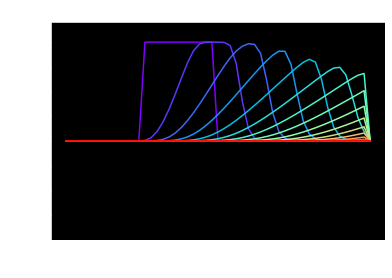

In [7]:
u,x = convection(151, 51, 2.0, 2.0, 0.5)
plot_convection(u,x,151,'Figure 3: c=0.5m/s, nt=151, nx=51, tmax=2s')

## Learn More

For a careful walk-through of the discretization of the convection equation with finite differences (and all steps from 1 to 4), watch **Video Lesson 4** by Prof. Barba on YouTube.

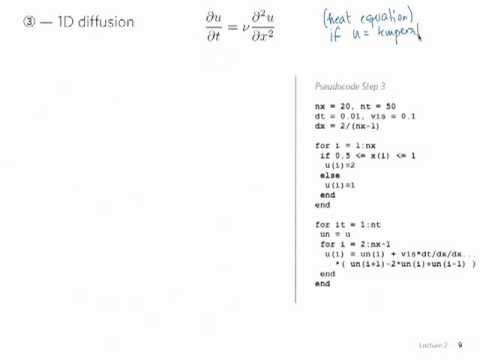

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('y2WaK7_iMRI')

In [3]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> (The cell above executes the style for this notebook.)